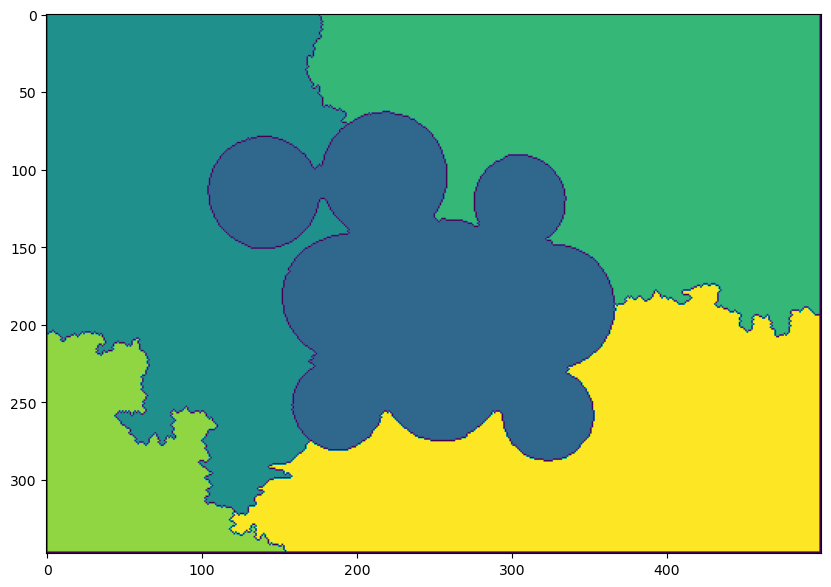

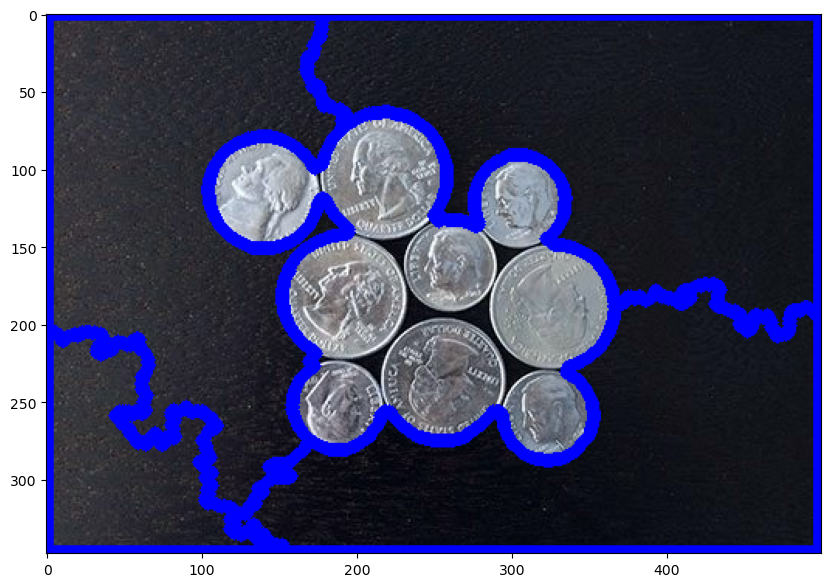

In [14]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
def display(img,cmap=None):
    fig=plt.figure(figsize=(10,8))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)
    plt.show()

    




img=cv2.imread("gorsel1.jpg")
blur=cv2.medianBlur(img,5)
gray=cv2.cvtColor(blur,cv2.COLOR_RGB2GRAY)
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
bg=cv2.dilate(opening,kernel,iterations=2)

dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)

ret ,fg=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
fg=np.uint8(fg)
unknown=cv2.subtract(bg,fg)

ret,markers=cv2.connectedComponents(fg)
markers=markers+1

markers[unknown==255]=0

markers=cv2.watershed(img,markers)

contours ,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(img,contours,i,(0,0,255),5)



display(markers)

display(img)



cv2.destroyAllWindows()